In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [50]:
#Menggabungkan dua dataset

data1 = pd.read_csv('Datasets/Final/train.csv')
data2 = pd.read_csv('Datasets/Final/test.csv')
frames = [data1, data2]
data = pd.concat(frames).drop_duplicates().reset_index(drop=True)
# result.to_csv(r'data.csv', index=False)

In [51]:
data = pd.read_csv('Datasets/Final/train.csv')

# Pre-processing

In [52]:
data.isnull().sum()

Unnamed: 0                  0
gender                      0
date_of_birth               0
workclass                   0
education_level             0
education_num               0
marital_status              0
occupation                  0
relationship                0
capital_gain                0
capital_loss                0
hours_per_week              0
approved                    0
address                     0
email                       0
inquiry_purpose_code      917
institute_type              0
account_type                0
asset_class_cd          25008
asset_code                 63
portfolio_type              3
dtype: int64

In [53]:
data = data.drop(['Unnamed: 0', 'email', 'address', 'date_of_birth'],axis=1)

data.fillna(0, inplace=True)
data.head(20)

,gender,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
0,Female,Local-gov,HS-grad,9.0,Widowed,Adm-clerical,Not-in-family,0.0,0.0,12.0,0,16.0,NBF,5,0,1.0,R
1,Male,Private,Assoc-voc,11.0,Married-civ-spouse,Machine-op-inspct,Husband,0.0,0.0,20.0,0,2.0,PUB,47,S,1.0,I
2,Female,Private,Assoc-voc,11.0,Never-married,Priv-house-serv,Not-in-family,0.0,0.0,30.0,0,13.0,PVT,189,0,1.0,I
3,Male,Local-gov,Some-college,10.0,Widowed,Exec-managerial,Not-in-family,6849.0,0.0,40.0,0,16.0,NBF,5,0,1.0,R
4,Female,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Other-relative,0.0,0.0,20.0,1,99.0,BRO,5,0,1.0,R
5,Male,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Sales,Husband,0.0,0.0,40.0,0,13.0,NBF,184,S,1.0,I
6,Male,Self-emp-inc,Masters,14.0,Married-civ-spouse,Sales,Husband,0.0,0.0,48.0,1,99.0,PVT,5,0,1.0,R
7,Female,Private,Some-college,10.0,Married-civ-spouse,Sales,Wife,0.0,0.0,35.0,0,13.0,NBF,5,0,1.0,R
8,Female,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,0.0,0.0,90.0,1,99.0,PVT,5,0,1.0,R
9,Female,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,0.0,0.0,40.0,0,16.0,PVT,5,0,1.0,R


In [54]:
data.isnull().sum()

gender                  0
workclass               0
education_level         0
education_num           0
marital_status          0
occupation              0
relationship            0
capital_gain            0
capital_loss            0
hours_per_week          0
approved                0
inquiry_purpose_code    0
institute_type          0
account_type            0
asset_class_cd          0
asset_code              0
portfolio_type          0
dtype: int64

In [55]:
data.dtypes

gender                   object
workclass                object
education_level          object
education_num           float64
marital_status           object
occupation               object
relationship             object
capital_gain            float64
capital_loss            float64
hours_per_week          float64
approved                  int64
inquiry_purpose_code    float64
institute_type           object
account_type              int64
asset_class_cd           object
asset_code              float64
portfolio_type           object
dtype: object

In [56]:
data.columns

Index(['gender', 'workclass', 'education_level', 'education_num',
       'marital_status', 'occupation', 'relationship', 'capital_gain',
       'capital_loss', 'hours_per_week', 'approved', 'inquiry_purpose_code',
       'institute_type', 'account_type', 'asset_class_cd', 'asset_code',
       'portfolio_type'],
      dtype='object')

In [57]:
categorical_col = ['gender', 'workclass', 'education_level', 'marital_status', 'occupation', 'relationship', 'institute_type', 'asset_class_cd', 'portfolio_type']

In [58]:
le = LabelEncoder()
# data_new = le.fit_transform(data)
df = pd.DataFrame([])
for i in data.columns:
    if i in categorical_col:
        ff = le.fit_transform(data[i].astype(str))
        print(ff)
        df[i] = ff
    else:
        df[i] = data[i]

[0 1 0 ... 1 0 1]
[1 2 2 ... 3 2 2]
[11  8  8 ...  9  1 11]
[6 2 4 ... 2 0 0]
[0 6 8 ... 3 7 0]
[1 0 1 ... 0 4 1]
[5 6 7 ... 5 7 5]
[0 7 0 ... 7 0 0]
[4 2 2 ... 2 4 2]


In [59]:
df = df.iloc[:1000, :]

In [60]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
df_std = pd.DataFrame(std_scaler.fit_transform(df), columns=data.columns)

df_std

,gender,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
0,-1.447748,-1.275242,0.184295,-0.444772,2.263541,-1.517649,-0.279567,-0.142812,-0.239253,-2.439981,-0.581969,-0.301834,-0.878233,-0.532189,-0.499904,-0.075786,0.805161
1,0.690728,-0.208986,-0.625201,0.357341,-0.451351,-0.035570,-0.891311,-0.142812,-0.239253,-1.759989,-0.581969,-0.717583,-0.052050,-0.221508,2.063705,-0.075786,-1.267326
2,-1.447748,-0.208986,-0.625201,0.357341,0.906095,0.458457,-0.279567,-0.142812,-0.239253,-0.909999,-0.581969,-0.390923,0.774134,0.828889,-0.499904,-0.075786,-1.267326
3,0.690728,-1.275242,1.263623,-0.043715,2.263541,-0.776610,-0.279567,0.875790,-0.239253,-0.060009,-0.581969,-0.301834,-0.878233,-0.532189,-0.499904,-0.075786,0.805161
4,-1.447748,1.923525,-0.355369,1.159454,-0.451351,0.705470,0.332177,-0.142812,-0.239253,-1.759989,1.718304,2.162964,-5.009151,-0.532189,-0.499904,-0.075786,0.805161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.690728,0.857270,-0.355369,1.159454,-0.451351,1.199496,-0.891311,-0.142812,-0.239253,-0.060009,1.718304,-0.301834,-0.878233,0.828889,-0.499904,-0.075786,-1.267326
996,-1.447748,-0.208986,0.184295,-0.444772,0.906095,-0.035570,0.943921,-0.142812,-0.239253,-0.060009,-0.581969,-0.390923,0.774134,-0.532189,-0.499904,-0.075786,0.805161
997,0.690728,-0.208986,0.184295,-0.444772,-0.451351,-0.035570,-0.891311,-0.142812,-0.239253,-0.060009,-0.581969,-0.776976,0.774134,-0.532189,-0.499904,-0.075786,0.805161
998,0.690728,1.923525,0.184295,-0.444772,-0.451351,1.693523,-0.891311,-0.142812,-0.239253,0.789981,-0.581969,-0.390923,-0.878233,1.109981,2.063705,-0.075786,-1.267326


# Train

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X = df.drop('approved', axis=1, inplace=False)
X

,gender,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
0,0,1,11,9.0,6,0,1,0.0,0.0,12.0,16.0,5,5,0,1.0,4
1,1,2,8,11.0,2,6,0,0.0,0.0,20.0,2.0,6,47,7,1.0,2
2,0,2,8,11.0,4,8,1,0.0,0.0,30.0,13.0,7,189,0,1.0,2
3,1,1,15,10.0,6,3,1,6849.0,0.0,40.0,16.0,5,5,0,1.0,4
4,0,4,9,13.0,2,9,2,0.0,0.0,20.0,99.0,0,5,0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,3,9,13.0,2,11,0,0.0,0.0,40.0,16.0,5,189,0,1.0,2
996,0,2,11,9.0,4,6,3,0.0,0.0,40.0,13.0,7,5,0,1.0,4
997,1,2,11,9.0,2,6,0,0.0,0.0,40.0,0.0,7,5,0,1.0,4
998,1,4,11,9.0,2,13,0,0.0,0.0,50.0,13.0,5,227,7,1.0,2


In [63]:
y = df['approved']
y

0      0
1      0
2      0
3      0
4      1
      ..
995    1
996    0
997    0
998    0
999    0
Name: approved, Length: 1000, dtype: int64

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## SVM

In [65]:
from sklearn import svm
model_svm = svm.SVC(kernel='linear')
model_svm.fit(X_train, y_train)

model_svm

SVC(kernel='linear')

In [82]:
predict_svm = model_svm.predict(X_test)
predict_svm

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [85]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report

print(classification_report(y_test, predict_svm))
print(fbeta_score(y_test, predict_svm, beta=1.3, average='micro'))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       236
           1       0.61      0.53      0.57        64

    accuracy                           0.83       300
   macro avg       0.74      0.72      0.73       300
weighted avg       0.82      0.83      0.82       300

0.8266666666666667


## SVR

In [75]:
model_svr = svm.SVR(kernel='rbf')
model_svr.fit(X_train, y_train.astype('int'))

model_svr


SVR()

In [76]:

predict_svr = model_svr.predict(X_test)
predict_svr.round()

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  1.,  0., -0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0

In [78]:
print(fbeta_score(y_test, predict_svm, beta=1.3, average='micro'))

0.8266666666666667


## Decision Tree

[Text(215.68223623143567, 213.0912, 'X[6] <= 0.5\nentropy = 0.841\nsamples = 700\nvalue = [511, 189]'),
 Text(154.78155167079208, 204.3936, 'X[7] <= 5095.5\nentropy = 1.0\nsamples = 289\nvalue = [147, 142]'),
 Text(151.4667001856436, 195.696, 'X[3] <= 12.5\nentropy = 0.991\nsamples = 264\nvalue = [147, 117]'),
 Text(110.25765779702971, 186.9984, 'X[8] <= 1738.0\nentropy = 0.903\nsamples = 185\nvalue = [126, 59]'),
 Text(103.62795482673268, 178.3008, 'X[9] <= 32.5\nentropy = 0.879\nsamples = 178\nvalue = [125, 53]'),
 Text(100.31310334158417, 169.60320000000002, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(106.9428063118812, 169.60320000000002, 'X[9] <= 82.0\nentropy = 0.901\nsamples = 167\nvalue = [114, 53]'),
 Text(103.62795482673268, 160.9056, 'X[1] <= 3.5\nentropy = 0.892\nsamples = 165\nvalue = [114, 51]'),
 Text(77.97670173267328, 152.208, 'X[2] <= 5.5\nentropy = 0.923\nsamples = 139\nvalue = [92, 47]'),
 Text(63.08576732673268, 143.5104, 'X[9] <= 47.5\nentropy = 0.439\n

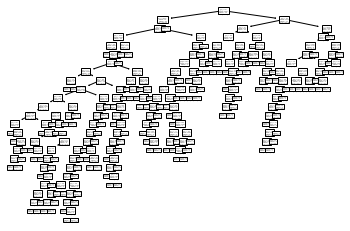

In [79]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# create model
model_tree = DecisionTreeClassifier(criterion='entropy')
# training model
model_tree.fit(X_train, y_train)
# show tree
tree.plot_tree(model_tree)

In [80]:
# Predict Model
pred_tree = model_tree.predict(X_test)

# Evaluate using dataset
accuracy = (pred_tree == y_test).sum()/len(y_test)
accuracy

0.8